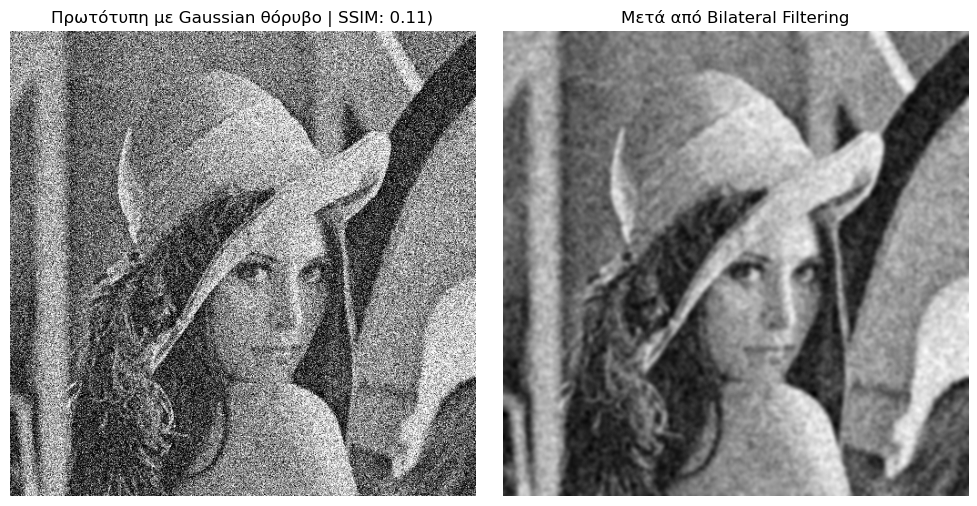

In [34]:
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFilter, Image
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Φόρτωση εικόνας
img = Image.open('lenna-n1.jpg').convert('L')

# Εφαρμογή Bilateral Filtering
filtered = img.filter(ImageFilter.GaussianBlur(radius=2))

img_array = np.array(img)
filtered_array = np.array(filtered)

image1_ssim = ssim(img_array, filtered_array, data_range=img_array.max() - img_array.min())

# Εμφάνιση πριν και μετά
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title(f"Πρωτότυπη με Gaussian θόρυβο | SSIM: {image1_ssim:.2f})")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Μετά από Bilateral Filtering")
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



(-0.5, 511.5, 511.5, -0.5)

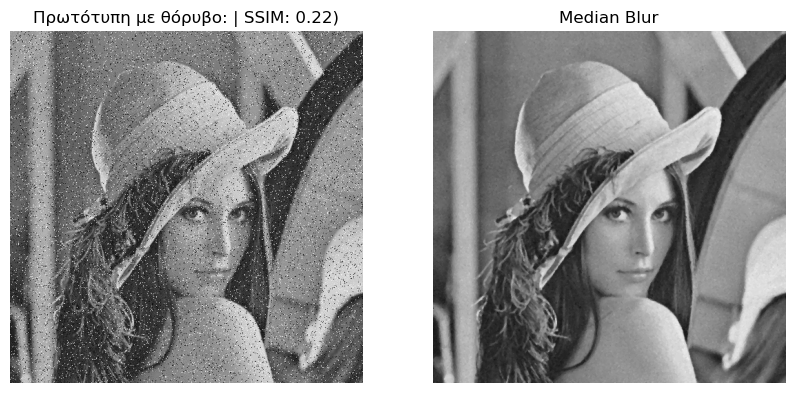

In [35]:
img = cv2.imread('lenna-n2.jpg', cv2.IMREAD_GRAYSCALE)

filtered = cv2.medianBlur(img, 3)

img_array = np.array(img)
filtered_array = np.array(filtered)

image1_ssim = ssim(img_array, filtered_array, data_range=img_array.max() - img_array.min())


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title(f"Πρωτότυπη με θόρυβο: | SSIM: {image1_ssim:.2f})")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median Blur")
plt.imshow(filtered, cmap='gray')
plt.axis('off')



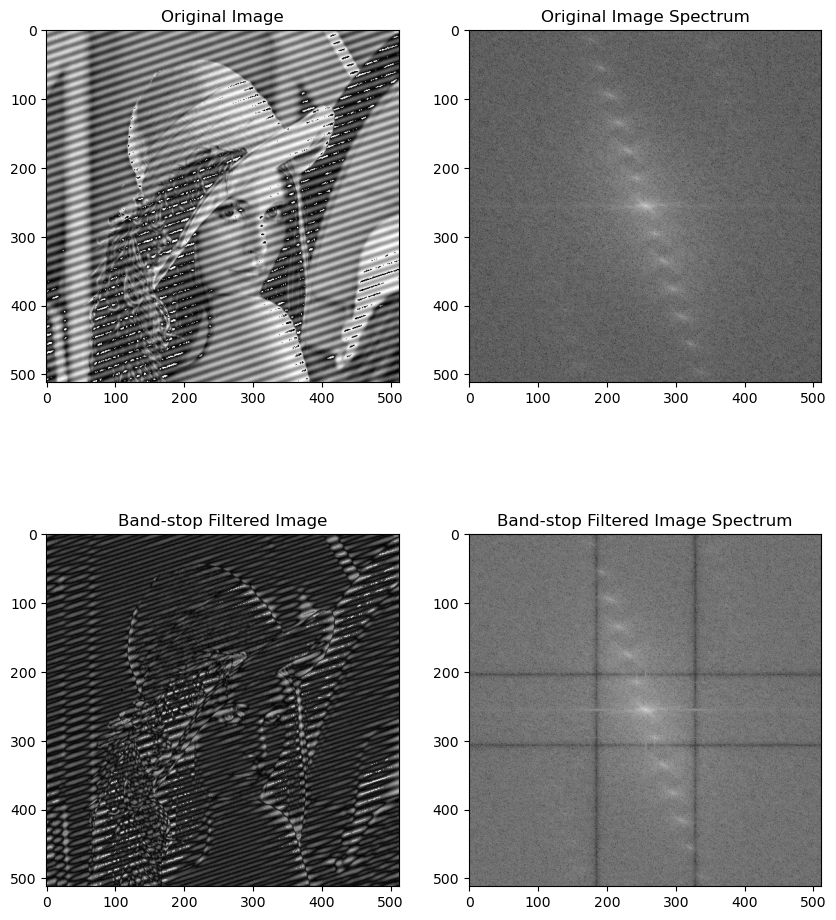

In [26]:
import scipy.signal as sig
import numpy as np
import skimage as sk

from scipy.fft import fft2, fftshift

def apply_band_reject_filter(image, center, width):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.ones((rows, cols), dtype=np.uint8)
    mask[crow - width//2:crow + width//2, ccol - center//2:ccol + center//2] = 0

    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    f_transform_masked = f_transform_shifted * mask

    f_inverse_shifted = np.fft.ifftshift(f_transform_masked)
    image_filtered = np.fft.ifft2(f_inverse_shifted)
    image_filtered = np.abs(image_filtered)
    return image_filtered

image = cv2.imread('lenna-n3.jpg', cv2.IMREAD_GRAYSCALE)
filtered = apply_band_reject_filter(image, 14, 10)


fig, axs = plt.subplots(2, 2, figsize=(10, 12))

axs[0, 0].imshow(image_14_original, cmap="gray")
axs[0, 0].set_title("Original Image")

spectrum = np.log(1 + np.abs(fftshift(fft2(image_14_original))))
axs[0, 1].imshow(spectrum, cmap="gray")
axs[0, 1].set_title("Original Image Spectrum")

axs[1, 0].imshow(filtered, cmap="gray")
axs[1, 0].set_title("Band-stop Filtered Image")

axs[1, 1].imshow(np.log(np.abs(image_14_notch_freq)), cmap="gray")
axs[1, 1].set_title("Band-stop Filtered Image Spectrum")

plt.show()